<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data: ', x_data.shape)
print('t_data: ', t_data.shape)

x_data:  (15, 3)
t_data:  (15,)


# 모델구축
 - w, b값을 찾는다

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(3, ), activation='linear'))

# 모델컴파일
- 과적합과 손실함수

In [ ]:
model.compile(optimizer=SGD(learning_rate=1e-2), loss = 'mse')
model.summary() # Para가 4개인 이유는 입력층이 3개이므로 각각에대한 가중치w 3개와 b 1개

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [ ]:
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.1719e-07
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 5.1181e-07
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.0619e-07
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.0077e-07
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.9528e-07
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.9000e-07
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.8474e-07
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.7949e-07
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.7435e-07
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.6922e-07
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.6425e-07
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.5924e-07
E

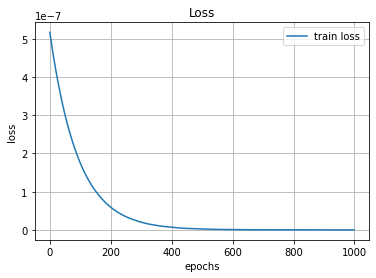

In [ ]:
# 그레프

import matplotlib.pyplot as plt

plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')    # hist.history['loss']는 model에서 loss값을 간직하고있다
plt.legend(loc='best')

plt.show()

# 모델평가,예측

In [ ]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-4.9999914]
 [-3.0000005]
 [-4.000015 ]
 [ 9.000021 ]
 [ 6.999993 ]]
[-5, -3, -4, 9, 7]


In [ ]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0000021],
       [-2.999998 ],
       [ 2.0000012]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.1582323e-05], dtype=float32)>]
